# Assignment 3

**name:**

**email:**

In this Assignment, you will use Python to handle several exercises related the last 4 topics of the course.
All exercises are individual. 
We expect you to submit a Jupyter Notebook (i.e., pre-organized and provided through Moodle). 
Your submission should include all the datasets and files we need to run your programs (we will run your notebook). 
When grading your assignments, we will, in addition to functionality, also take into account code quality. 
We expect well-structured and efficient solutions.

## Lecture 6 - Decision Trees and Ensembles

**Dataset:** Bank Marketing Dataset (UCI)

**Variables description:** Check the bank-aditional-names.txt file

**Task Description:** Predict whether a client will subscribe to a term deposit (y column) based on marketing data.

### Task 1 (mandatory): Data Exploration and Preprocessing

Load and clean the dataset (bank-additional-full.csv). Encode categorical features. Split the dataset into training and testing sets.

**Plot:** Show class distribution (e.g., a print) of the target variable and a bar chart of the most frequent categorical values.

**Discuss:** Is the dataset imbalanced? Which features stand out?

--- Your answer here ---

The Bank Marketing dataset is highly imbalanced, with only 11.27% of clients subscribing to term deposits ("yes" class) compared to 88.73% who did not ("no" class), which necessitates techniques like class weighting or resampling to prevent model bias. Several features stand out, including economic indicators (e.g., emp.var.rate, euribor3m) that were explicitly added to improve predictions, as well as high missing values in default (20% "unknown") and education (4% "unknown"). Additionally, categorical features like job (mostly administrative/blue-collar) and marital (mostly married) show clear patterns, while pdays and poutcome may be crucial for predicting campaign success. Proper handling of missing values and feature selection will be essential for building an effective predictive model.

os.getcwd(): /Users/aakrishlama/Desktop/ML_2DV516/ML/ModelsA3
Missing values (unknown) per column
job has  330 unknown values
marital has  80 unknown values
education has  1731 unknown values
default has  8597 unknown values
housing has  990 unknown values
loan has  990 unknown values
contact has  0 unknown values
month has  0 unknown values
day_of_week has  0 unknown values
poutcome has  0 unknown values
y has  0 unknown values

Class counts:
no     36548
yes     4640
Name: y, dtype: int64

Class percentages:
no     88.734583
yes    11.265417
Name: y, dtype: float64


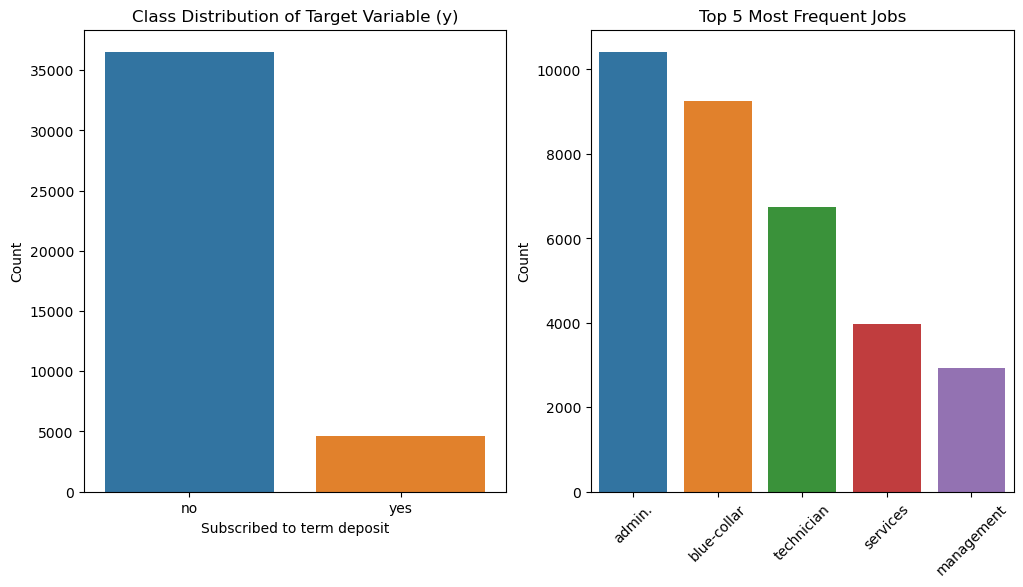

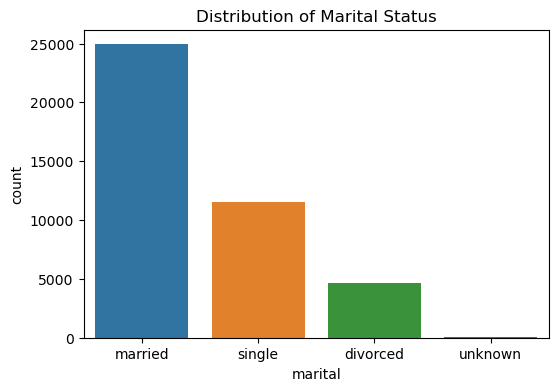

In [ ]:
import os 
print("os.getcwd():", os.getcwd())
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# 1. Load the data
df = pd.read_csv('/Users/aakrishlama/Desktop/ML_2DV516/ML/ModelsA3/datasets/BankMarketing/bank-additional-full.csv', sep=';')


# cleaning data 
print("Missing values (unknown) per column")
for col in df.columns:
    if df[col].dtype == "object":
        print(f"{col} has  {(df[col] == 'unknown').sum()} unknown values")

# drop columns of duration according to txt file.
df = df.drop('duration', axis=1)


categorical_cols = df.select_dtypes(include=['object']).columns.drop("y")

# encoding categorical columns
df_encoded = pd.get_dummies(df, columns= categorical_cols, drop_first=True)

# encoding target variable to 1 and 0
df_encoded["y"] = df_encoded["y"].map({"yes": 1, "no": 0})


# split and train data.
X = df_encoded.drop("y", axis=1)
y = df_encoded["y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#plot correlation 
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='y', data=df)
plt.title('Class Distribution of Target Variable (y)')
plt.xlabel('Subscribed to term deposit')
plt.ylabel('Count')

# plot class distribution
class_counts = df['y'].value_counts()
class_percent = df['y'].value_counts(normalize=True) * 100

print("\nClass counts:")
print(class_counts)
print("\nClass percentages:")
print(class_percent)   


plt.subplot(1, 2, 2)
top_jobs = df['job'].value_counts().head(5)
sns.barplot(x=top_jobs.index, y=top_jobs.values)
plt.title('Top 5 Most Frequent Jobs')
plt.xticks(rotation=45)
plt.ylabel('Count')

plt.figure(figsize=(6, 4))
sns.countplot(x='marital', data=df, order=df['marital'].value_counts().index)
plt.title('Distribution of Marital Status')
plt.show()
        

### Task 2 (Mandatory): Train a decision tree using scikit-learn.

Use max depth = 4 for initial interpretability. Visualize the tree using plot_tree().

**Discuss:** Which features are used at the top levels of the tree? Are they intuitive? 

--- Your answer here ---

Missing values (unknown) per column:
job: 330
marital: 80
education: 1731
default: 8597
housing: 990
loan: 990
contact: 0
month: 0
day_of_week: 0
poutcome: 0
y: 0


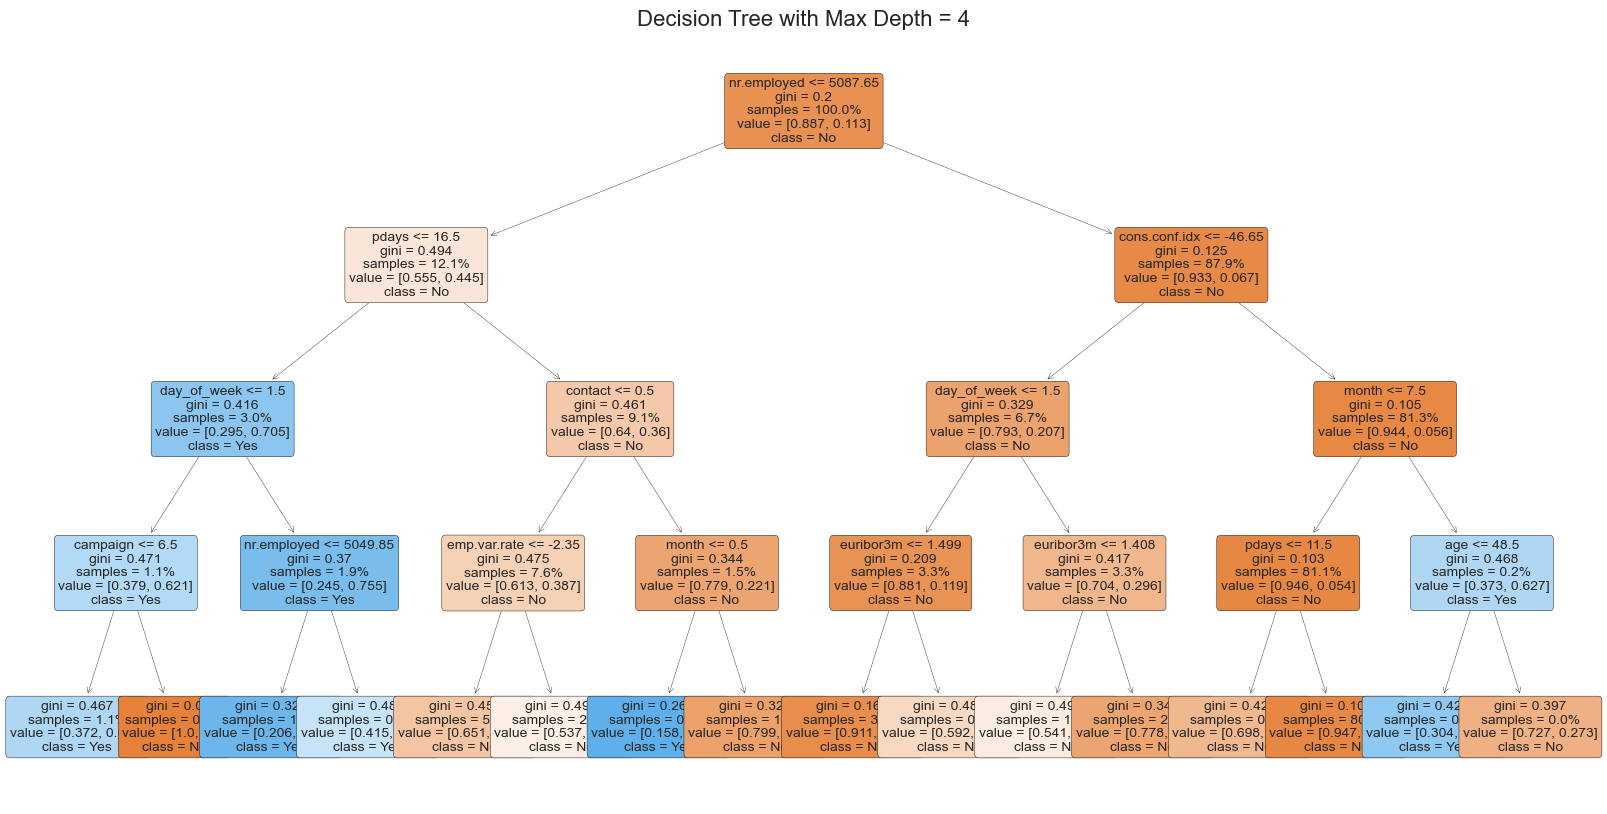


Feature Importances:
age: 0.0018
job: 0.0000
marital: 0.0000
education: 0.0000
default: 0.0000
housing: 0.0000
loan: 0.0000
contact: 0.0152
month: 0.0321
day_of_week: 0.0290
campaign: 0.0021
pdays: 0.1307
previous: 0.0000
poutcome: 0.0000
emp.var.rate: 0.0098
cons.price.idx: 0.0000
cons.conf.idx: 0.0635
euribor3m: 0.0306
nr.employed: 0.6851


In [21]:
# Import required libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# 1. Load the data fresh
data = pd.read_csv('/Users/aakrishlama/Desktop/ML_2DV516/ML/ModelsA3/datasets/BankMarketing/bank-additional-full.csv', sep=';')

# 2. Data preprocessing
# Drop duration as suggested in the dataset description
data = data.drop('duration', axis=1)

# Print missing values (unknown) per column
print("Missing values (unknown) per column:")
for col in data.columns:
    if data[col].dtype == 'object':
        print(f"{col}: {(data[col] == 'unknown').sum()}")

# Encode target variable
le = LabelEncoder()
data['y'] = le.fit_transform(data['y'])  # 0 = 'no', 1 = 'yes'



# Select categorical columns (excluding target)
cat_cols = data.select_dtypes(include=['object']).columns

# Label encode categorical variables
for col in cat_cols:
    data[col] = le.fit_transform(data[col])

# 3. Split data into features (X) and target (y)
X = data.drop('y', axis=1)
y = data['y']

# 4. Train decision tree with max_depth=4
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X, y)

# 5. Visualize the tree
plt.figure(figsize=(20, 10))
plot_tree(tree_model, 
          feature_names=list(X.columns),  # Convert to list to fix the error
          class_names=['No', 'Yes'], 
          filled=True, 
          rounded=True, 
          proportion=True,
          fontsize=10)
plt.title("Decision Tree with Max Depth = 4", fontsize=16)
plt.show()

# 6. Print feature importances
print("\nFeature Importances:")
for feature, importance in zip(X.columns, tree_model.feature_importances_):
    print(f"{feature}: {importance:.4f}")

### Task 3 (mandatory): Evaluate Performance and Overfitting
Train the same tree with increasing depths (e.g., 2 to 10). Evaluate on both training and test sets using accuracy and F1 score. Plot Accuracy vs. depth and F1 vs. depth.

**Discuss:** Is there overfitting? Where does performance peak?

--- Your answer here ---

In [22]:
#--- Write your code here ---#

### Task 4 (Mandatory): Train and Compare Ensembles
Train a Random Forest and a Gradient Boosting model.
Tune hyperparameters using grid search (e.g., max_depth, n_estimators).
Do a plot comparing the ROC curves of the three models (Tree, RF, GB).

**Discuss:** Which model performs best and why?

---- Your answers here ----

In [23]:
#--- Write your code here ---#

### Task 5 (Non-Mandatory): Feature Importance Analysis

Extract and plot feature importances for the ensemble models.

Plot the top 10 features by importance (bar chart).

**Discuss:** Are these the same features that dominated the decision tree?

---- Your answers here ----


In [24]:
#--- Write your code here ---#

### Task 6 (Non-Mandatory): Test Model Robustness to Noisy Features

Add synthetic noise features to the dataset. 
Generate 5–10 random columns with values sampled from a uniform or normal distribution.
Concatenate them with the original feature set.
Retrain your Random Forest and Gradient Boosting with the noisy features included.
Evaluate their performance on the test set.

Create a Bar plot comparing test set accuracy or F1 score before adding noise and after adding noise. 

**Discuss:** Did model performance degrade? Why or why not?

What does this tell you about the model’s ability to ignore irrelevant features?

Would feature selection or regularization help in this case?

--- Your answer here --- 


In [25]:
#--- Write your code here ---#

## Lecture 7 - Kernels, Maximal Margin Classifiers

### Task 1 (Mandatory): Data Exploration and Preprocessing

Load the dataset using sklearn.datasets.load_breast_cancer().

Standardize the features using StandardScaler.
Use pairplot or PCA to project to 2D and show class separation.

**Discuss:** Do the two classes appear linearly separable?
 
--- Your answer here --- 

In [26]:
#--- Write your code here ---#

### Task 2 (Mandatory): Train Linear and RBF SVMs

Train two SVM classifiers: one with a linear kernel and one with an RBF kernel.

Use a fixed C=1.0, and for RBF, use default gamma='scale'.

Plot the confusion matrices or classification reports for both models.

**Discuss:** Which kernel performed better? Why might that be?

--- Your answer here --- 

In [27]:
#--- Write your code here ---#

### Task 3 (Mandatory): Hyperparameter Tuning

Use grid search with cross-validation to find optimal values of C and gamma for the RBF kernel.

Plot a heatmap of validation accuracy or F1 score for the grid.

**Discuss:** What combination of hyperparameters gave the best results?

--- Your answer here --- 

In [28]:
#--- Write your code here ---#

### Task 4 (non-mandatory): Investigate the Effect of the Regularization Parameter C

Train RBF SVM models for a wide range of C values (e.g., 0.001, 0.01, 0.1, 1, 10, 100), keeping gamma fixed.

For each model, record training and test accuracy or F1 score.

Plot the training and test scores vs. C (line plot).

**Discuss:**

- What happens when C is very small or very large?

- What does this tell you about the role of C in the SVM objective?

--- Your answer here --- 

In [29]:
#--- Write your code here ---#

### Task 5 (non-mandatory): Compare SVM with Logistic Regression

Train a logistic regression model on the same (standardized) data.

Compare its performance with your best-performing SVM.

Plot, side-by-side bar plot of accuracy, precision, recall, and F1 score for both models.

**Discuss:**

- Which model performed better overall?

- Were there significant differences in false positives or false negatives?

- Based on your task (e.g., cancer detection), which type of error is more costly?

In [30]:
#--- Write your code here ---#

## Lecture 8 - Clustering (All Mandatory)

In this assignment you will implement an unsupervised learning method, then you will test it with data sets of your choice. 

You must deliver the results in a jupyter notebook, combining the code, text, and images in a nice readable sequence.

**Goal:** Implement the clustering algorithm called Bisecting k-Means.
Bisecting k-Means [1] is a clustering algorithm that combines hierarchical clustering with k-Means. However, differently than the hierarchical clustering we saw in the lecture, it uses a divisive, top-down approach (instead of the agglomerative, bottom-up that we are used to). It consists on the steps described below:

1. Start with a single cluster including all the observations in the data set.
2. [Bisecting] Divide the largest cluster into two smaller sub-clusters using k-Means.
3. Redo the bisecting step iter times and choose the best solution according to the Sum of Squared Errors (SSE).
4. Repeat from Step 2 until you have k clusters.

Implement the Bisecting k-Means algorithm in a function called bkmeans. It should take as input: (a) the data X to cluster, as a n × p matrix (n observations by p features); (b) the number k of clusters; and (c) the number iter of iterations for step 3. It should generate as output a n × 1 vector with the cluster indices for each of the n observations.
Notes:
1. You must implement K-Means yourself, from scratch.
2. The requirements are strict. I will use standard test cases in order to test your solution by calling the function
bkmeans as described.

[1] M. Steinbach, G. Karypis, V. Kumar et al., “A comparison of document clustering techniques,” in
KDD workshop on text mining, vol. 400, no. 1. Boston, 2000, pp. 525–526. [Online]. Available:
http://glaros.dtc.umn.edu/gkhome/fetch/papers/docclusterKDDTMW00.pdf

In [31]:
#--- Write your code here ---#

## Lecture 9 - Dimensionality Reduction 

### Task 1 (mandatory)

In this exercise you will visualize and explore the results of the previous exercise in a simple manner, using scatterplots.
This will be a relatively open-ended task; you will choose three data sets and explore them with the new technique you built for yourself. 

These could be data sets you already used in previous assignments, or you could download some
new data. The only restrictions are that (a) the data sets must be multidimensional (i.e., more than 4 features), (b) they must have labels, and (c) they must have at least 1000 data points.

These are some examples of interesting places to obtain new data sets:

* http://archive.ics.uci.edu/ml/index.php
* https://www.openml.org/search?type=data
* https://www.kaggle.com/datasets

Be careful, however, with the size of the data set you choose. Python can get quite slow with too much data, and the scatterplots will also be very crowded, so go for smaller data sets this time.

**Important**: Download the datasets and put them under the folder *datasets* so that we can run your code.

In [32]:
#--- Write your code here ---#

### Task 2 (non-mandatory) - Comparison of DR Techniques

Generate a scatterplot matrix comparing the results of three DR techniques: PCA, MDS, and t-SNE, for each data set chosen in the previous exercise. 
The resulting visualization should be a 3 × 3 matrix where each cell is a scatterplot of a DR technique applied to a data set. 
Color the points by their target variables (i.e., class/labels) using a qualitative colormap.

Then answer this shortly (in a couple of paragraphs): 
- In your opinion, which technique performed the best for each data set, regarding the separation of the classes? 
- How are the classes in the data sets separated? 
- Are some classes easier to separate than others?


### Task 3 (non-mandatory): Comparison of Clustering Techniques

Choose one of the DR techniques from the previous exercise and generate a similar scatterplot matrix to compare the results of Bisecting k-Means with classic k-Means and hierarchical clustering for each data set. 
The resulting visualization should be a 3 × 3 matrix where each cell is a scatterplot of the chosen DR technique applied to a data set, with the colors of the points showing the clusters using a qualitative colormap (see, e.g., https://matplotlib.org/tutorials/colors/colormaps.html).

Then answer this shortly (in a couple of paragraphs): 
- In your opinion, which clustering technique performed the best for each data set? 
- How are the clusters in the data sets separated? 
- Are some clusters easier to separate than others?